In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder

# preprocessing data (data cleaning)
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape

(5110, 12)

In [24]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [26]:
df.drop('id', axis=1, inplace=True)

In [27]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'age': array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
        7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
        6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
        8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
        6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
        4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
        4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
        3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
        3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
        1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
        2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
        3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
        2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
        9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 

In [28]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [29]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [30]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [32]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [33]:
change = df['gender'] == 'Other'
df.loc[change, 'gender'] = np.random.choice(['Male', 'Female'], size=change.sum())

In [34]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [35]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
# feature engineering
# kategori bmi 
def bmi_category(bmi):
    if bmi < 18.5: return 'underweight'
    elif bmi < 25: return 'normal'
    elif bmi < 30: return 'overweight'
    else: return 'obese'
df['bmi_category'] = df['bmi'].apply(bmi_category)
# penyakit jantung dan hipertensi 
df['high_risk'] = ((df['hypertension'] == 1) | (df['heart_disease'] == 1)).astype(int)
# rasio glukosa & bmi 
df['glucose_bmi_ratio'] = df['avg_glucose_level'] / df['bmi']
# lifestyle
df["smoke_score"] = df["smoking_status"].map({
    "never smoked": 0,
    "formerly smoked": 1,
    "smokes": 2,
    "Unknown": 0
})

df["work_score"] = df["work_type"].map({
    "children": 0,
    "Never_worked": 0,
    "Private": 1,
    "Self-employed": 2,
    "Govt_job": 1
})


In [37]:
categorical_cols = ['gender', 'ever_married', 'work_type',
                    'Residence_type', 'smoking_status', 'bmi_category']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,high_risk,glucose_bmi_ratio,smoke_score,work_score,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category_obese,bmi_category_overweight,bmi_category_underweight
0,67.0,0,1,228.69,36.6,1,1,6.248361,1,1,...,True,False,False,True,True,False,False,True,False,False
1,61.0,0,0,202.21,28.1,1,0,7.196085,0,2,...,False,True,False,False,False,True,False,False,True,False
2,80.0,0,1,105.92,32.5,1,1,3.259077,0,1,...,True,False,False,False,False,True,False,True,False,False
3,49.0,0,0,171.23,34.4,1,0,4.977616,2,1,...,True,False,False,True,False,False,True,True,False,False
4,79.0,1,0,174.12,24.0,1,1,7.255000,0,2,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("stroke", axis=1)
y = df["stroke"]

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature Selection
selector = SelectKBest(mutual_info_classif, k=20)
X_train_selected = selector.fit_transform(X_train_full, y_train)
X_test_selected = selector.transform(X_test_full)  

selected_features = X_train_full.columns[selector.get_support()]
print("Fitur Terpilih:\n", selected_features.tolist())

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

Fitur Terpilih:
 ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'high_risk', 'glucose_bmi_ratio', 'work_score', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'bmi_category_obese', 'bmi_category_overweight', 'bmi_category_underweight']


Logistic Regression Model
Accuracy: 0.7485322896281801

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022

ROC AUC Score: 0.8515843621399177


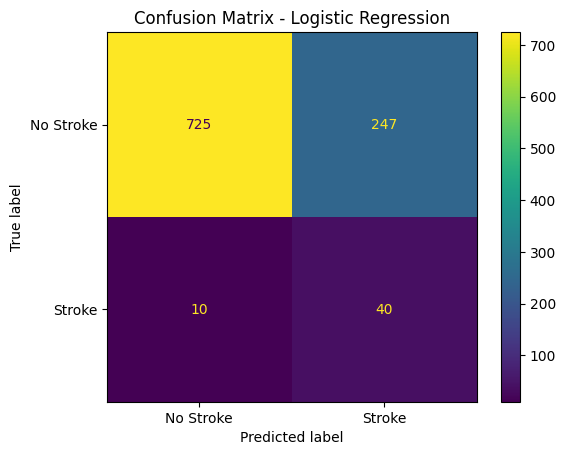

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Model")
print("Accuracy:", acc_log)
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Support Vector Machine (SVM)
Accuracy: 0.7700587084148728

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86       972
           1       0.14      0.70      0.23        50

    accuracy                           0.77      1022
   macro avg       0.56      0.74      0.55      1022
weighted avg       0.94      0.77      0.83      1022

ROC AUC Score: 0.7946296296296296


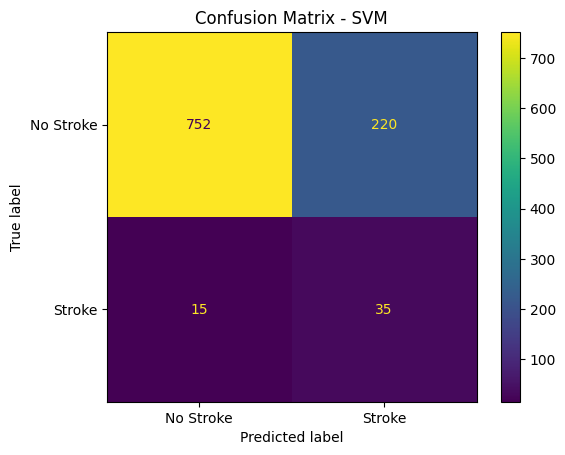

In [45]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("Support Vector Machine (SVM)")
print("Accuracy:", acc_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, svm_model.decision_function(X_test_scaled)))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - SVM")
plt.show()


Random Forest
Accuracy: 0.9500978473581213
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score: 0.8091563786008231


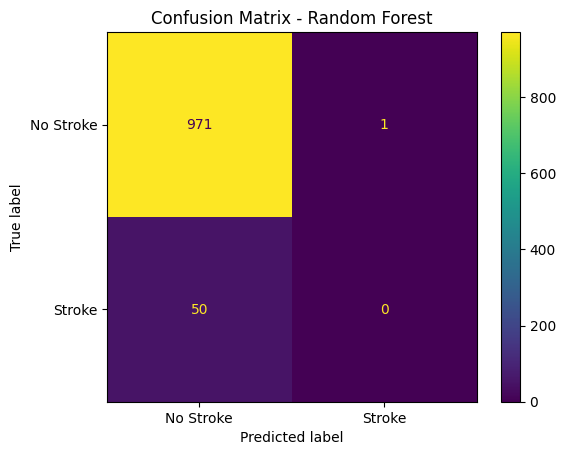

In [41]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_selected)[:, 1]))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


XGBoost
Accuracy: 0.898238747553816
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       972
           1       0.18      0.30      0.22        50

    accuracy                           0.90      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.92      0.90      0.91      1022

ROC AUC Score: 0.8194855967078188


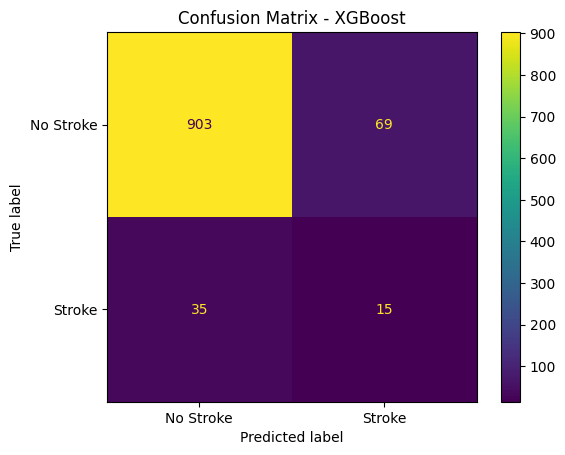

In [42]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_selected, y_train)
y_pred_xgb = xgb_model.predict(X_test_selected)

print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_selected)[:, 1]))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV ROC AUC Score: 0.8433600035528055

Test Set Performance:
Accuracy: 0.7093933463796478

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82       972
           1       0.13      0.84      0.22        50

    accuracy                           0.71      1022
   macro avg       0.56      0.77      0.52      1022
weighted avg       0.95      0.71      0.79      1022

ROC AUC Score: 0.8420781893004116


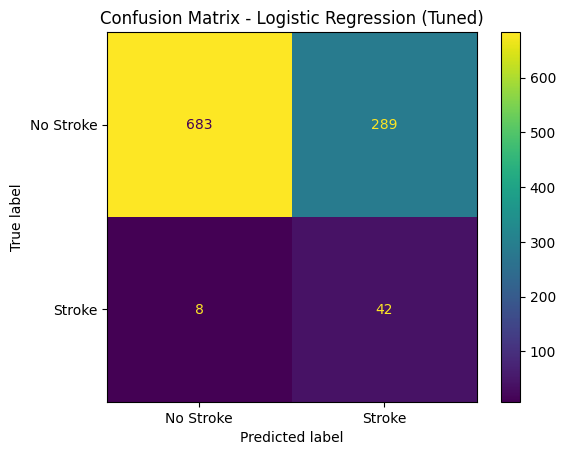

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# hyperparameter tuning utk logistic regression
log_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

log_grid = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42),
    log_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

log_grid.fit(X_train_scaled, y_train)
log_model_tuned = log_grid.best_estimator_

print("\nBest Parameters:", log_grid.best_params_)
print("Best CV ROC AUC Score:", log_grid.best_score_)

y_pred_log_tuned = log_model_tuned.predict(X_test_scaled)
y_proba_log_tuned = log_model_tuned.predict_proba(X_test_scaled)[:, 1]

print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_tuned))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_log_tuned))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log_tuned),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.show()

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV ROC AUC Score: 0.8367509929913528

Test Set Performance:
Accuracy: 0.6996086105675147

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.69      0.81       972
           1       0.12      0.80      0.21        50

    accuracy                           0.70      1022
   macro avg       0.55      0.75      0.51      1022
weighted avg       0.94      0.70      0.78      1022

ROC AUC Score: 0.8405967078189299


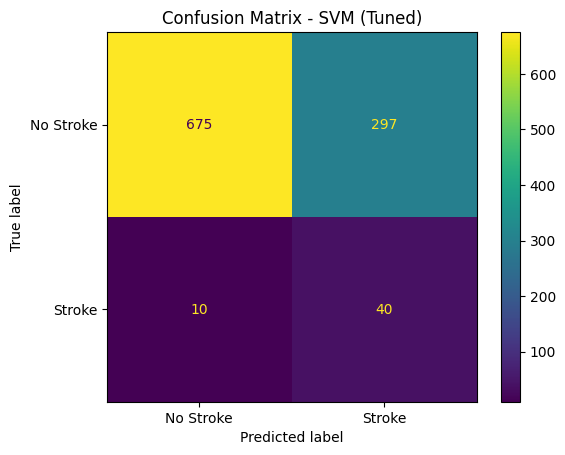

In [44]:
# hyperparameter tuning utk SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'poly']
}

svm_grid = GridSearchCV(
    SVC(class_weight='balanced', probability=True, random_state=42),
    svm_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train_scaled, y_train)
svm_model_tuned = svm_grid.best_estimator_

print("\nBest Parameters:", svm_grid.best_params_)
print("Best CV ROC AUC Score:", svm_grid.best_score_)

y_pred_svm_tuned = svm_model_tuned.predict(X_test_scaled)
y_proba_svm_tuned = svm_model_tuned.predict_proba(X_test_scaled)[:, 1]

print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_tuned))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_svm_tuned))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm_tuned),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - SVM (Tuned)")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}
Best CV ROC AUC Score: 0.8215189411494037

Test Set Performance:
Accuracy: 0.9315068493150684

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.26      0.22      0.24        50

    accuracy                           0.93      1022
   macro avg       0.61      0.59      0.60      1022
weighted avg       0.93      0.93      0.93      1022

ROC AUC Score: 0.8265020576131686


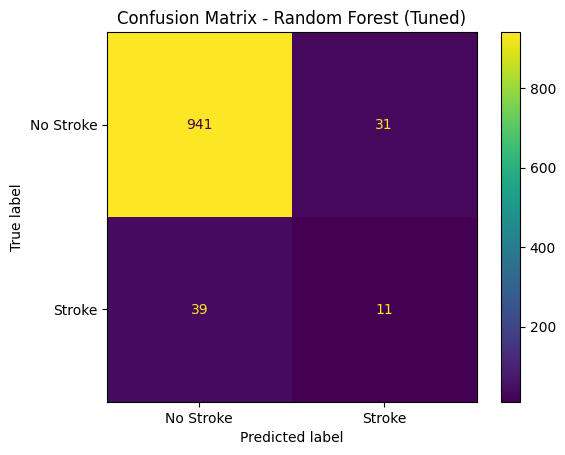

In [46]:
# hyperparameter tuning utk random forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    rf_param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_random.fit(X_train_selected, y_train)
rf_model_tuned = rf_random.best_estimator_

print("\nBest Parameters:", rf_random.best_params_)
print("Best CV ROC AUC Score:", rf_random.best_score_)

y_pred_rf_tuned = rf_model_tuned.predict(X_test_selected)
y_proba_rf_tuned = rf_model_tuned.predict_proba(X_test_selected)[:, 1]

print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_tuned))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf_tuned),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best CV ROC AUC Score: 0.8407356222716119

Test Set Performance:
Accuracy: 0.6986301369863014

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.69      0.81       972
           1       0.12      0.82      0.21        50

    accuracy                           0.70      1022
   macro avg       0.55      0.76      0.51      1022
weighted avg       0.94      0.70      0.78      1022

ROC AUC Score: 0.8488271604938271


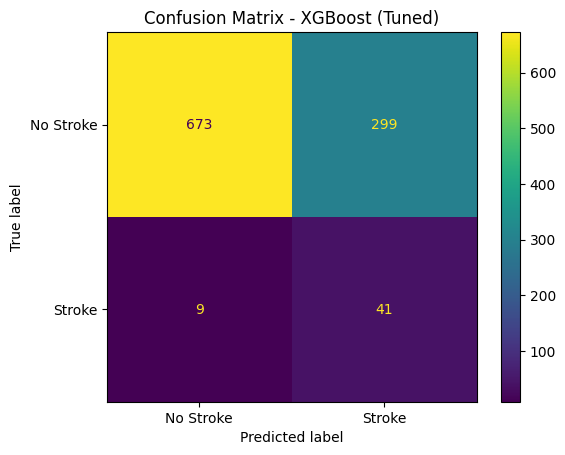

In [47]:
# hyperparameter tuning utk XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3, 5]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
        eval_metric='logloss',
        random_state=42
    ),
    xgb_param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_random.fit(X_train_selected, y_train)
xgb_model_tuned = xgb_random.best_estimator_

print("\nBest Parameters:", xgb_random.best_params_)
print("Best CV ROC AUC Score:", xgb_random.best_score_)

y_pred_xgb_tuned = xgb_model_tuned.predict(X_test_selected)
y_proba_xgb_tuned = xgb_model_tuned.predict_proba(X_test_selected)[:, 1]

print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_tuned))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb_tuned))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb_tuned),
                       display_labels=['No Stroke', 'Stroke']).plot()
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.show()


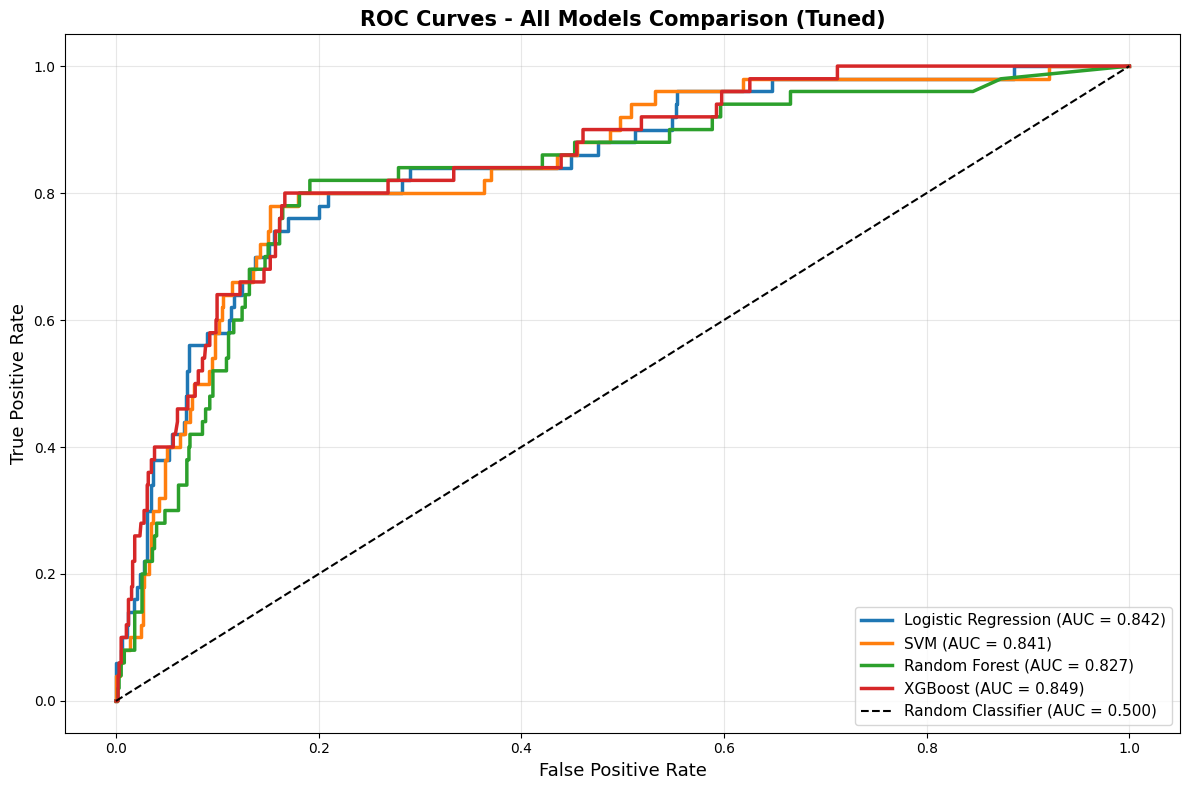

In [48]:
# comparison all model ROC curve 
plt.figure(figsize=(12, 8))

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log_tuned)
auc_log = roc_auc_score(y_test, y_proba_log_tuned)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})', linewidth=2.5)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm_tuned)
auc_svm = roc_auc_score(y_test, y_proba_svm_tuned)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})', linewidth=2.5)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf_tuned)
auc_rf = roc_auc_score(y_test, y_proba_rf_tuned)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2.5)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb_tuned)
auc_xgb = roc_auc_score(y_test, y_proba_xgb_tuned)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2.5)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', linewidth=1.5)

plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curves - All Models Comparison (Tuned)', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

FEATURE IMPORTANCE TABLE - TOP 15 FEATURES
                       Feature  RF_Importance  XGB_Importance  LogReg_Coef  Avg_Importance
                           age       0.383985        0.273122     1.263411        1.000000
                     high_risk       0.040255        0.141395     0.146178        0.246079
             avg_glucose_level       0.132638        0.049614     0.117053        0.206576
              ever_married_Yes       0.032978        0.113931     0.000000        0.167676
                           bmi       0.120158        0.048332     0.000000        0.163295
             glucose_bmi_ratio       0.112062        0.033439     0.000000        0.138091
                  hypertension       0.018222        0.056259     0.000000        0.084480
       bmi_category_overweight       0.013890        0.050533     0.019506        0.078877
                    work_score       0.022973        0.040190     0.000000        0.068993
            bmi_category_obese       0.010585  

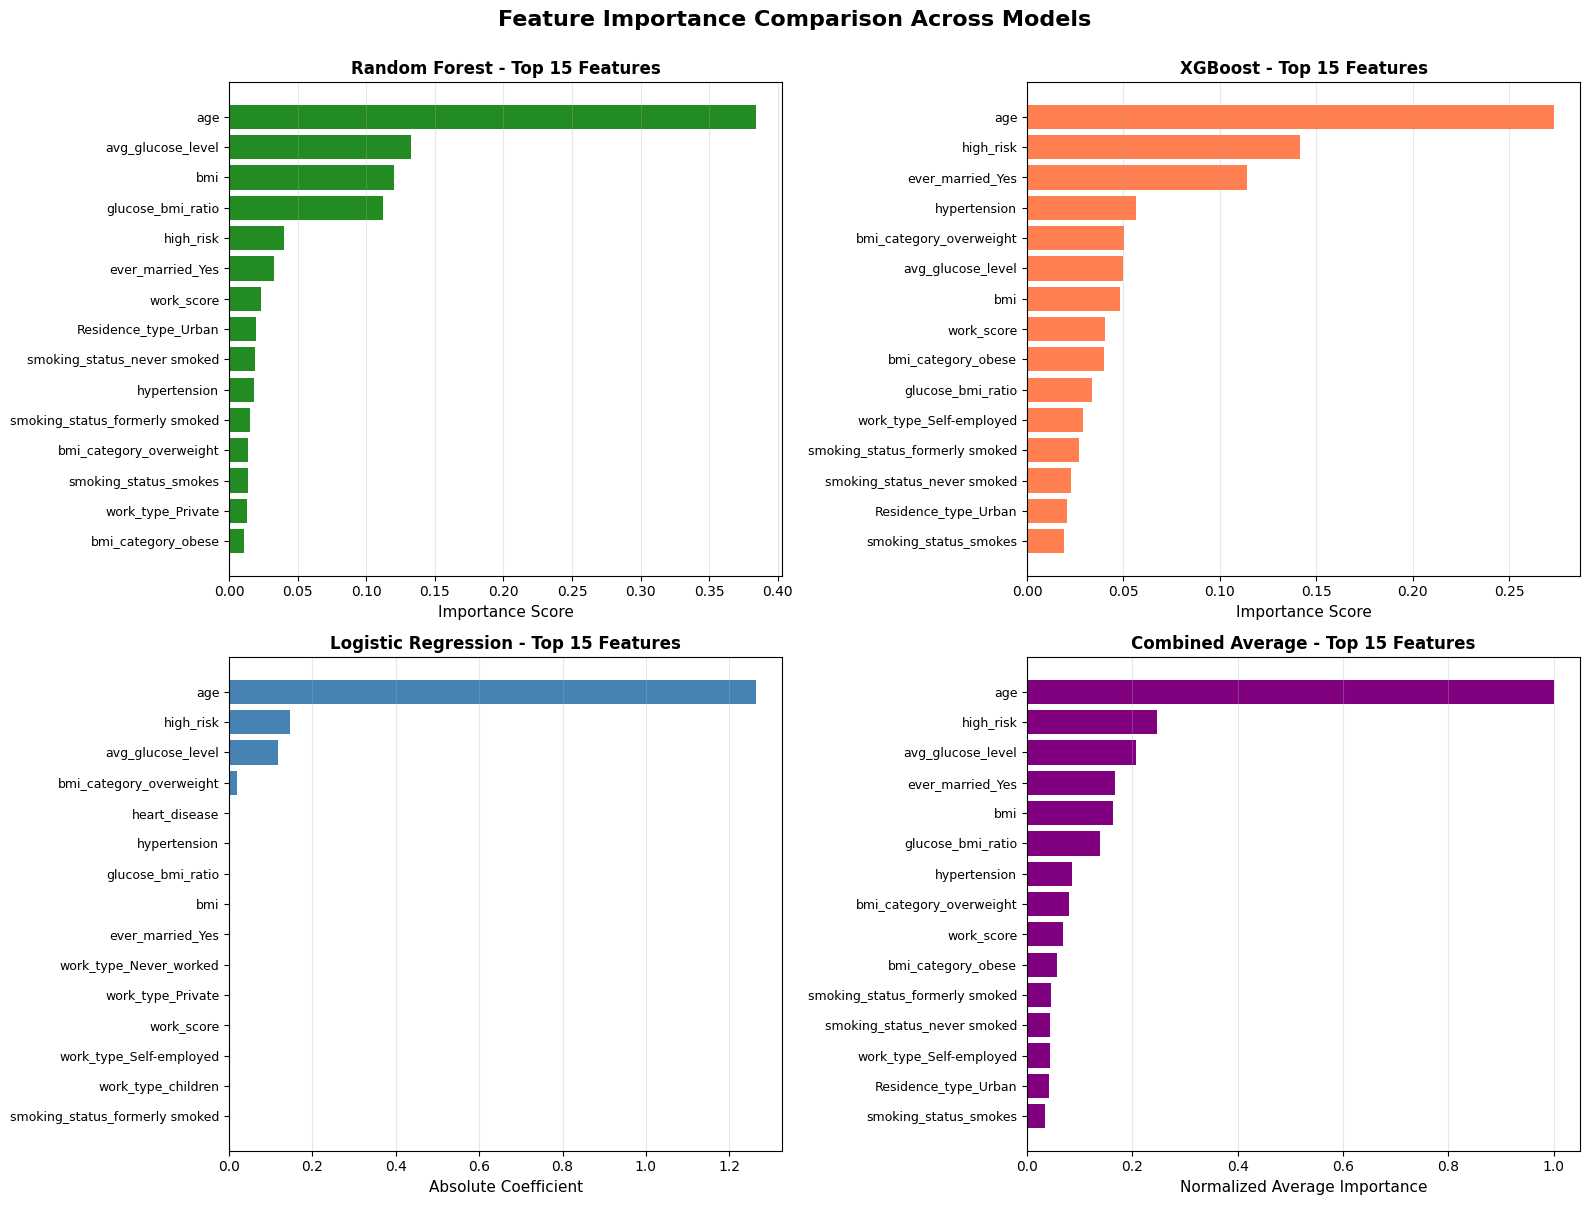

In [53]:
# feature importance comparison
rf_importance = pd.DataFrame({
    'Feature': selected_features,
    'RF_Importance': rf_model_tuned.feature_importances_
}).sort_values('RF_Importance', ascending=False)

xgb_importance = pd.DataFrame({
    'Feature': selected_features,
    'XGB_Importance': xgb_model_tuned.feature_importances_
}).sort_values('XGB_Importance', ascending=False)

log_importance = pd.DataFrame({
    'Feature': selected_features,
    'LogReg_Coef': np.abs(log_model_tuned.coef_[0])
}).sort_values('LogReg_Coef', ascending=False)

importance_df = rf_importance.merge(xgb_importance, on='Feature').merge(log_importance, on='Feature')

importance_df['RF_Normalized'] = importance_df['RF_Importance'] / importance_df['RF_Importance'].max()
importance_df['XGB_Normalized'] = importance_df['XGB_Importance'] / importance_df['XGB_Importance'].max()
importance_df['LogReg_Normalized'] = importance_df['LogReg_Coef'] / importance_df['LogReg_Coef'].max()

importance_df['Avg_Importance'] = importance_df[['RF_Normalized', 'XGB_Normalized', 'LogReg_Normalized']].mean(axis=1)
importance_df = importance_df.sort_values('Avg_Importance', ascending=False)

print("FEATURE IMPORTANCE TABLE - TOP 15 FEATURES")
print(importance_df[['Feature', 'RF_Importance', 'XGB_Importance', 'LogReg_Coef', 'Avg_Importance']].head(15).to_string(index=False))

print("COMPLETE FEATURE IMPORTANCE TABLE - ALL FEATURES")
print(importance_df[['Feature', 'RF_Importance', 'XGB_Importance', 'LogReg_Coef', 'Avg_Importance']].to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Random Forest
top_rf = rf_importance.head(15)
axes[0, 0].barh(range(len(top_rf)), top_rf['RF_Importance'], color='forestgreen')
axes[0, 0].set_yticks(range(len(top_rf)))
axes[0, 0].set_yticklabels(top_rf['Feature'], fontsize=9)
axes[0, 0].set_xlabel('Importance Score', fontsize=11)
axes[0, 0].set_title('Random Forest - Top 15 Features', fontweight='bold', fontsize=12)
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# XGBoost
top_xgb = xgb_importance.head(15)
axes[0, 1].barh(range(len(top_xgb)), top_xgb['XGB_Importance'], color='coral')
axes[0, 1].set_yticks(range(len(top_xgb)))
axes[0, 1].set_yticklabels(top_xgb['Feature'], fontsize=9)
axes[0, 1].set_xlabel('Importance Score', fontsize=11)
axes[0, 1].set_title('XGBoost - Top 15 Features', fontweight='bold', fontsize=12)
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# Logistic Regression
top_log = log_importance.head(15)
axes[1, 0].barh(range(len(top_log)), top_log['LogReg_Coef'], color='steelblue')
axes[1, 0].set_yticks(range(len(top_log)))
axes[1, 0].set_yticklabels(top_log['Feature'], fontsize=9)
axes[1, 0].set_xlabel('Absolute Coefficient', fontsize=11)
axes[1, 0].set_title('Logistic Regression - Top 15 Features', fontweight='bold', fontsize=12)
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

# Average Importance
top_avg = importance_df.head(15)
axes[1, 1].barh(range(len(top_avg)), top_avg['Avg_Importance'], color='purple')
axes[1, 1].set_yticks(range(len(top_avg)))
axes[1, 1].set_yticklabels(top_avg['Feature'], fontsize=9)
axes[1, 1].set_xlabel('Normalized Average Importance', fontsize=11)
axes[1, 1].set_title('Combined Average - Top 15 Features', fontweight='bold', fontsize=12)
axes[1, 1].invert_yaxis()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.suptitle('Feature Importance Comparison Across Models', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


In [51]:
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_tuned),
        accuracy_score(y_test, y_pred_svm_tuned),
        accuracy_score(y_test, y_pred_rf_tuned),
        accuracy_score(y_test, y_pred_xgb_tuned)
    ],
    'ROC AUC': [auc_log, auc_svm, auc_rf, auc_xgb],
    'Best CV Score': [
        log_grid.best_score_,
        svm_grid.best_score_,
        rf_random.best_score_,
        xgb_random.best_score_
    ]
})


print(f"BEST MODEL BY ROC AUC: {summary.loc[summary['ROC AUC'].idxmax(), 'Model']}")
print(f"Best ROC AUC Score: {summary['ROC AUC'].max():.4f}")

BEST MODEL BY ROC AUC: XGBoost
Best ROC AUC Score: 0.8488
